In [1]:
import numpy as np


from tensorflow.keras.models import Sequential ## pour initialiser un réseau
from tensorflow.keras import layers
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## créer CNN
classifier = Sequential() ## pour initialiser mon reseau

## ajouter la couche de convolution
classifier.add(Convolution2D(filters=32,kernel_size=3,strides=1,input_shape=(64,64,3),activation="relu"))

## pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

## ajout d'une couche de convolution, sans le input_shape, et de pooling
classifier.add(Convolution2D(filters=32,kernel_size=3,strides=1,activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(filters=32,kernel_size=3,strides=1,activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(filters=32,kernel_size=3,strides=1,activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))

## flatteing
classifier.add(Flatten())

## couche completement connecté
classifier.add(Dense(units=128,activation="relu"))
classifier.add(Dense(units=128,activation="relu"))
classifier.add(Dense(units=128,activation="relu"))
classifier.add(Dropout(0.3))

classifier.add(Dense(units=1,activation="sigmoid")) 

## compilation
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

## entrainer un CNN sur nos images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        'test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

hist = classifier.fit(
        train_generator,
        steps_per_epoch=250,
        epochs=75,
        validation_data=validation_generator,
        validation_steps=63)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/75
250/250 [==============================] - 31s 121ms/step - loss: 0.6884 - accuracy: 0.5356 - val_loss: 0.6781 - val_accuracy: 0.5860
Epoch 2/75
250/250 [==============================] - 30s 121ms/step - loss: 0.6399 - accuracy: 0.6365 - val_loss: 0.5881 - val_accuracy: 0.6990
Epoch 3/75
250/250 [==============================] - 30s 121ms/step - loss: 0.5834 - accuracy: 0.6956 - val_loss: 0.5842 - val_accuracy: 0.7035
Epoch 4/75
250/250 [==============================] - 30s 121ms/step - loss: 0.5530 - accuracy: 0.7168 - val_loss: 0.5367 - val_accuracy: 0.7355
Epoch 5/75
250/250 [==============================] - 31s 125ms/step - loss: 0.5248 - accuracy: 0.7396 - val_loss: 0.5109 - val_accuracy: 0.7570
Epoch 6/75
250/250 [==============================] - 30s 121ms/step - loss: 0.5002 - accuracy: 0.7554 - val_loss: 0.4720 - val_accuracy: 0.7755
Epoch 7/75
250/250 [==========================

In [4]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


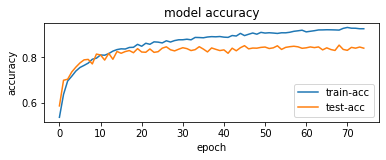

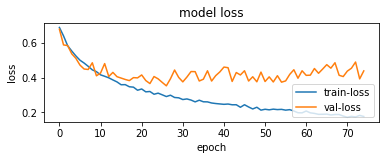

In [5]:
train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train-acc','test-acc'],loc= 'lower right')

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train-loss','val-loss'],loc= 'lower right')

In [6]:
test_image = image.load_img("des-chiens-renifleurs-decouvrent-des-sepultures-vieilles-de-3000-ans-en-croatie.jpg",target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
res = classifier.predict(test_image)
train_generator.class_indices

if res[0][0] == 1:
    prediction = "chien"
    print("chien")
else:
    prediction = "chat"
    print("chat")

chien


In [7]:

test_image = image.load_img("comment-soigner-une-plaie-dun-chat.jpg",target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
res = classifier.predict(test_image)
train_generator.class_indices

if res[0][0] == 1:
    prediction = "chien"
    print("chien")
else:
    prediction = "chat"
    print("chat")

chat
